In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn import linear_model

In [76]:
df = pd.read_csv('/content/homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000




```
`# linear regression single variable
```

# Building a model to predict the price of area

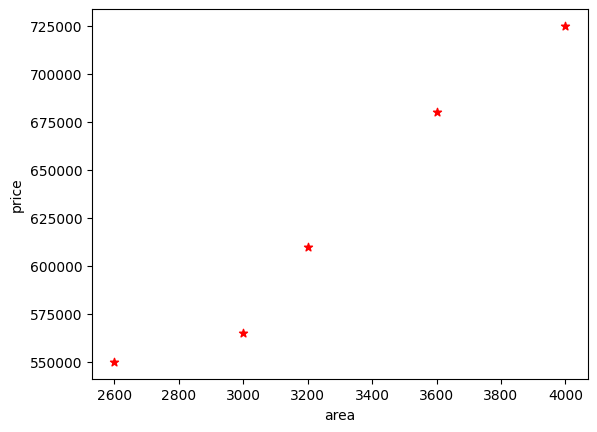

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter (df.area,df.price,color= 'red',marker='*')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

y = m * area + b


m is the slope which can be canculated using reg.coef_

In [ ]:
reg.coef_

array([135.78767123])

From that equation the value of b can be calculated using this  line

In [ ]:
reg.intercept_

180616.43835616432

PREDICTING THE PRICES OF THE AREA

In [ ]:
d= pd.read_csv('/content/area.csv')
d.head(3)

,area
0,4000
1,5000
2,6000


In [ ]:
reg.predict(d)

array([ 723767.12328767,  859554.79452055,  995342.46575342,
       1131130.1369863 , 1266917.80821918, 1402705.47945205,
       1538493.15068493, 1674280.82191781, 1810068.49315069,
       1945856.16438356, 2081643.83561644, 2217431.50684932,
       2353219.17808219, 2489006.84931507, 2624794.52054795])

In [ ]:
d['Price']= reg.predict(d)
d

,area,Price
0,4000,7.237671e+05
1,5000,8.595548e+05
2,6000,9.953425e+05
3,7000,1.131130e+06
4,8000,1.266918e+06
5,9000,1.402705e+06
6,10000,1.538493e+06
7,11000,1.674281e+06
8,12000,1.810068e+06
9,13000,1.945856e+06


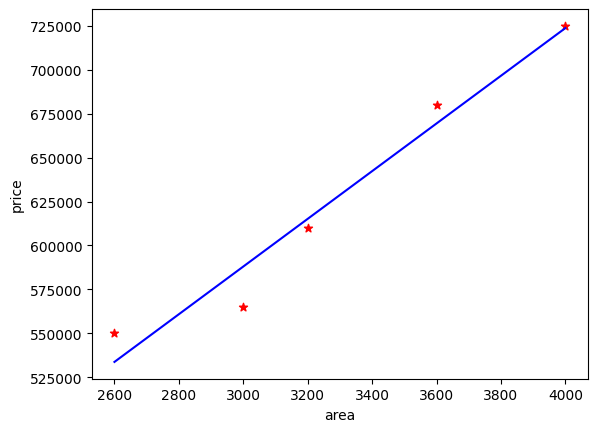

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color= 'red',marker='*')
plt.plot(df.area,reg.predict(df[['area']]),color= 'blue')

# Predicting Canadaian Income

In [ ]:
canada= pd.read_csv('/content/canada_per_capita_income.csv')
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
canada.rename(columns= { 'per capita income (US$)':'income'},inplace = True)

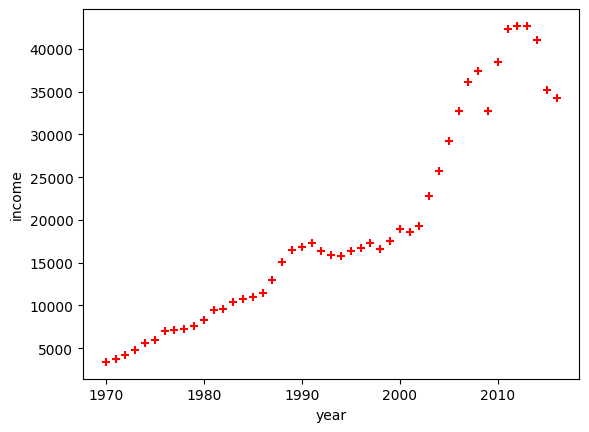

In [ ]:
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(canada.year,canada.income,color= 'red',marker ='+')

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(canada[['year']],canada.income)

LinearRegression()

In [ ]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
reg.coef_

array([828.46507522])

In [ ]:
reg.intercept_

-1632210.7578554575

# Linear Regression Using Multiple Variable

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [56]:
df = pd.read_csv('/content/homeprices.csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Filling NaN Values with Median Value

In [57]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [58]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


Filling NaN Values With Mean Values

In [50]:
df['bedrooms'].mean()

4.2

In [51]:
df['bedrooms'].fillna(df['bedrooms'].mean(),inplace = True)
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

In [63]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [64]:
reg.intercept_

221323.00186540396

LinearRegression()

In [65]:
reg.predict([[3000,4,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([602590.07937407])

Exercise

In [101]:
!pip install word2number


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from word2number import w2n

In [115]:
df = pd.read_csv('/content/hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [116]:
df.experience = df.experience.fillna('zero')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [117]:
df.experience = df.experience.apply(w2n.word_to_num)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [118]:
df.rename(columns= {'test_score(out of 10)':'test_score',
                    'interview_score(out of 10)':'Interview_score',
                    'salary($)':'Salary'},inplace = True)
df.head()

,experience,test_score,Interview_score,Salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [107]:
df.isnull().sum()

experience         0
test_score         1
Interview_score    0
Salary             0
dtype: int64

In [119]:
import math
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [120]:
df.test_score = df.test_score.fillna(median_test_score)
df.head()

,experience,test_score,Interview_score,Salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [124]:
df

,experience,test_score,Interview_score,Salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [128]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','Interview_score']],df['Salary'])


LinearRegression()

In [129]:
reg.predict([[12,10,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [122]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [123]:
reg.intercept_

17737.263464337688